# Install Necessary Libraries

In [1]:
import pandas as pd


# convert the dat files to the csv


files downloaded from the https://grouplens.org/datasets/movielens/10m/

In [2]:
# Function to convert a .dat file to .csv
def convert_to_csv(input_file, output_file, delimiter):
    # Read the file using pandas with the specified delimiter
    data = pd.read_csv(input_file, delimiter=delimiter, header=None, engine='python')
    # Save the data to a CSV file
    data.to_csv(output_file, index=False)

# Paths to the .dat files
movies_file = 'C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/raw/ml-10m/movies.dat'
ratings_file = 'C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/raw/ml-10m/ratings.dat'
tags_file = 'C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/raw/ml-10m/tags.dat'

# Convert movies.dat
convert_to_csv(movies_file, 'C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/processed/movies.csv', delimiter='::')
# Convert ratings.dat
convert_to_csv(ratings_file, 'C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/processed/ratings.csv', delimiter='::')
# Convert tags.dat
convert_to_csv(tags_file, 'C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/processed/tags.csv', delimiter='::')

# load the csv

In [3]:
movies = pd.read_csv("C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/processed/movies.csv")
ratings= pd.read_csv("C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/processed/ratings.csv")
tags=pd.read_csv("C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/processed/tags.csv")

# print the first few lines of the csv

In [4]:
movies.head()

,0,1,2
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
ratings.head()

,0,1,2,3
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392


In [6]:
tags.head()

,0,1,2,3
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835


 Give the columns name

In [7]:
movies = pd.read_csv("C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/processed/movies.csv")
ratings= pd.read_csv("C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/processed/ratings.csv")
tags=pd.read_csv("C:/Users/anujp/OneDrive/Desktop/MovieRecommendations/data/processed/tags.csv")

# Rename the columns to more descriptive names
ratings.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
tags.columns = ['UserID', 'MovieID', 'Tag', 'Timestamp']
movies.columns = ['MovieID', 'Title', 'Genres']

# Display the first few rows of each DataFrame to verify the new column names
print("Ratings DataFrame head:")
print(ratings.head())
print("\nTags DataFrame head:")
print(tags.head())
print("\nMovies DataFrame head:")
print(movies.head())


Ratings DataFrame head:
   UserID  MovieID  Rating  Timestamp
0       1      122     5.0  838985046
1       1      185     5.0  838983525
2       1      231     5.0  838983392
3       1      292     5.0  838983421
4       1      316     5.0  838983392

Tags DataFrame head:
   UserID  MovieID              Tag   Timestamp
0      15     4973       excellent!  1215184630
1      20     1747         politics  1188263867
2      20     1747           satire  1188263867
3      20     2424  chick flick 212  1188263835
4      20     2424            hanks  1188263835

Movies DataFrame head:
   MovieID                               Title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        Genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1              

# EDA

## 1 Datashape

1.1. Check DataFrame Shapes
python

In [8]:
# Check the number of rows and columns in each DataFrame
print("Ratings DataFrame shape:", ratings.shape)
print("Tags DataFrame shape:", tags.shape)
print("Movies DataFrame shape:", movies.shape)


Ratings DataFrame shape: (10000054, 4)
Tags DataFrame shape: (95580, 4)
Movies DataFrame shape: (10681, 3)


1.2. Display Data Types

In [9]:
# Display data types of each DataFrame
print("Ratings DataFrame data types:")
print(ratings.dtypes)

print("\nTags DataFrame data types:")
print(tags.dtypes)

print("\nMovies DataFrame data types:")
print(movies.dtypes)


Ratings DataFrame data types:
UserID         int64
MovieID        int64
Rating       float64
Timestamp      int64
dtype: object

Tags DataFrame data types:
UserID        int64
MovieID       int64
Tag          object
Timestamp     int64
dtype: object

Movies DataFrame data types:
MovieID     int64
Title      object
Genres     object
dtype: object


## 2. Handling Missing Values


2.1. Check for Missing Values

In [11]:
# Check for missing values in ratings DataFrame
print("Missing values in ratings:")
print(ratings.isnull().sum())

# Check for missing values in tags DataFrame
print("\nMissing values in tags:")
print(tags.isnull().sum())

# Check for missing values in movies DataFrame
print("\nMissing values in movies:")
print(movies.isnull().sum())


Missing values in ratings:
UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

Missing values in tags:
UserID        0
MovieID       0
Tag          16
Timestamp     0
dtype: int64

Missing values in movies:
MovieID    0
Title      0
Genres     0
dtype: int64


2.2. Handle Missing Values


In [12]:
# For example, drop rows with missing values
ratings.dropna(inplace=True)
tags.dropna(inplace=True)
movies.dropna(inplace=True)


## 3. Checking for Duplicates



In [13]:
# Check for duplicates in ratings DataFrame
print("Duplicates in ratings:", ratings.duplicated().sum())

# Check for duplicates in tags DataFrame
print("Duplicates in tags:", tags.duplicated().sum())

# Check for duplicates in movies DataFrame
print("Duplicates in movies:", movies.duplicated().sum())


Duplicates in ratings: 0
Duplicates in tags: 0
Duplicates in movies: 0


3.1. Remove Duplicates

In [ ]:
# Remove duplicate rows if any
ratings.drop_duplicates(inplace=True)
tags.drop_duplicates(inplace=True)
movies.drop_duplicates(inplace=True)


## 4. Descriptive Statistics


4.1. Summary Statistics of Ratings



In [14]:
# Summary statistics for ratings
print("Ratings summary statistics:")
print(ratings['Rating'].describe())


Ratings summary statistics:
count    1.000005e+07
mean     3.512422e+00
std      1.060418e+00
min      5.000000e-01
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64


4.2. Number of Unique Users and Movies


In [15]:
# Number of unique users and movies
print("Number of unique users:", ratings['UserID'].nunique())
print("Number of unique movies:", ratings['MovieID'].nunique())


Number of unique users: 69878
Number of unique movies: 10677


In [22]:
import pandas as pd

# Load your datasets if not already loaded
# ratings = pd.read_csv('path_to_ratings.csv')
# movies = pd.read_csv('path_to_movies.csv')

# Unique users and movies
print("Number of unique users:", ratings['UserID'].nunique())
print("Number of unique movies:", ratings['MovieID'].nunique())

# Min and Max user IDs
min_user_id = ratings['UserID'].min()
max_user_id = ratings['UserID'].max()
print("Minimum user ID:", min_user_id)
print("Maximum user ID:", max_user_id)

# Assuming all_user_ids is a Series of all possible user IDs from 1 to max_user_id
all_user_ids = pd.Series(range(1, max_user_id + 1))
existing_user_ids = pd.Series(ratings['UserID'].unique())
missing_user_ids = all_user_ids[~all_user_ids.isin(existing_user_ids)]

# Total number of missing user IDs
print("\nTotal number of missing user IDs:", len(missing_user_ids))


Number of unique users: 69878
Number of unique movies: 10677
Minimum user ID: 1
Maximum user ID: 71567

Total number of missing user IDs: 1689


<span style="color:red;">In the development and deployment of recommendation systems, it is essential to handle missing user data accurately to maintain the reliability and performance of the model. Particularly, when interfacing with a trained model, it's important to ensure that the system is robust against errors arising from non-existent user IDs. To achieve this, the system should include checks to confirm the presence of a user ID in the dataset before attempting any prediction of user preferences or interactions. If a user ID is found to be missing, the model should clearly notify this through an error message, such as "user is not available." This step not only prevents the model from executing erroneous operations but also aids in debugging and maintaining the quality of the user experience by clearly communicating the issue to the end user or system administrator. Such practices are crucial for the smooth operation of machine learning models in production environments where data completeness cannot always be guaranteed.</span>


In [ ]:
# Assuming 'ratings' DataFrame has a column 'UserID' that contains the user IDs
min_user_id = ratings['UserID'].min()
max_user_id = ratings['UserID'].max()

# Print the minimum and maximum user ID
print("Minimum user ID:", min_user_id)
print("Maximum user ID:", max_user_id)



Minimum user ID: 1
Maximum user ID: 71567


5. Ratings Distribution


5.1. Histogram of Ratings


C:\Users\anujp\AppData\Local\Temp\ipykernel_23024\2844918927.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=ratings, palette='viridis')


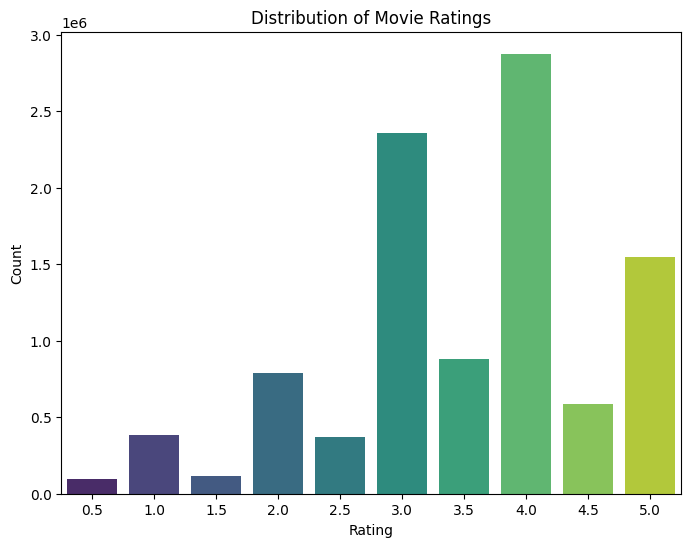

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histogram of ratings
plt.figure(figsize=(8,6))
sns.countplot(x='Rating', data=ratings, palette='viridis')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


## 6. User Activity Analysis


6.1. Number of Ratings per User

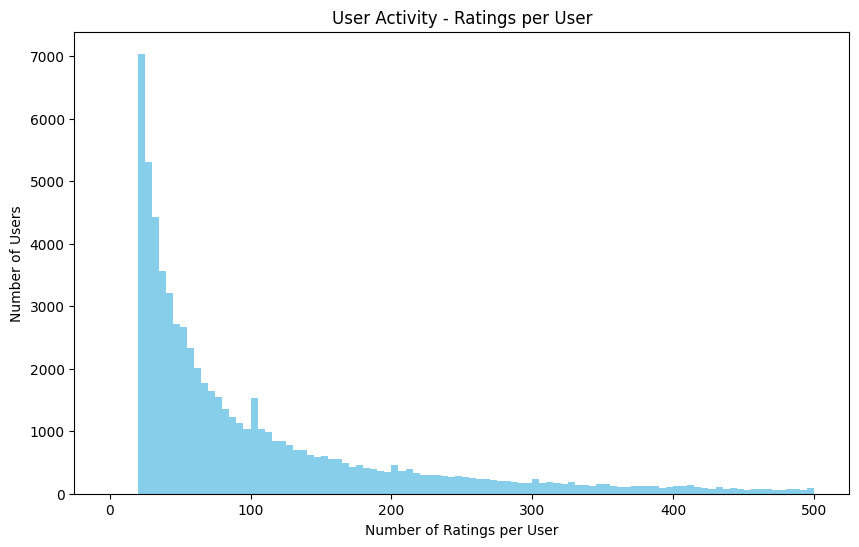

In [24]:
# Calculate number of ratings per user
user_ratings_count = ratings.groupby('UserID')['Rating'].count().reset_index()
user_ratings_count.rename(columns={'Rating': 'RatingsCount'}, inplace=True)

# Plot the distribution
plt.figure(figsize=(10,6))
plt.hist(user_ratings_count['RatingsCount'], bins=100, range=(0, 500), color='skyblue')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Number of Users')
plt.title('User Activity - Ratings per User')
plt.show()


## 7. Movie Popularity Analysis

7.1. Number of Ratings per Movie

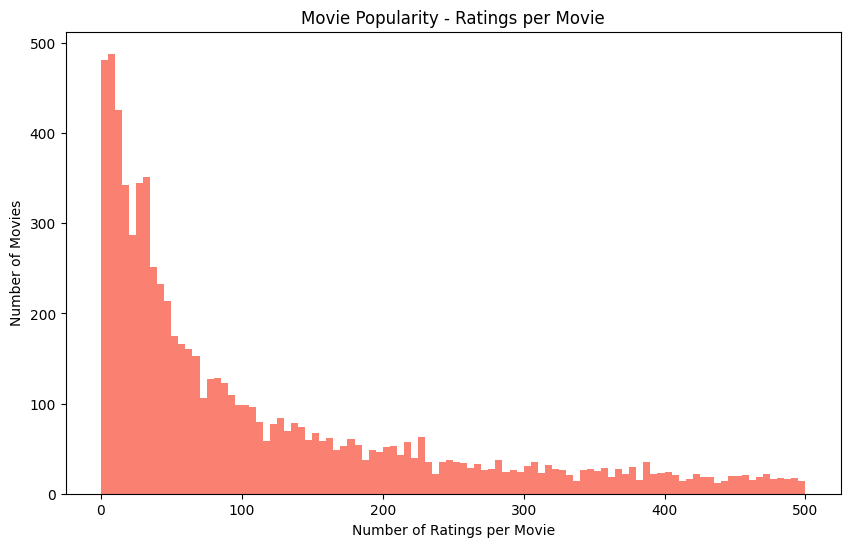

In [25]:
# Calculate number of ratings per movie
movie_ratings_count = ratings.groupby('MovieID')['Rating'].count().reset_index()
movie_ratings_count.rename(columns={'Rating': 'RatingsCount'}, inplace=True)

# Plot the distribution
plt.figure(figsize=(10,6))
plt.hist(movie_ratings_count['RatingsCount'], bins=100, range=(0, 500), color='salmon')
plt.xlabel('Number of Ratings per Movie')
plt.ylabel('Number of Movies')
plt.title('Movie Popularity - Ratings per Movie')
plt.show()


## 8. Ratings Over Time

8.1. Convert Timestamp to Datetime

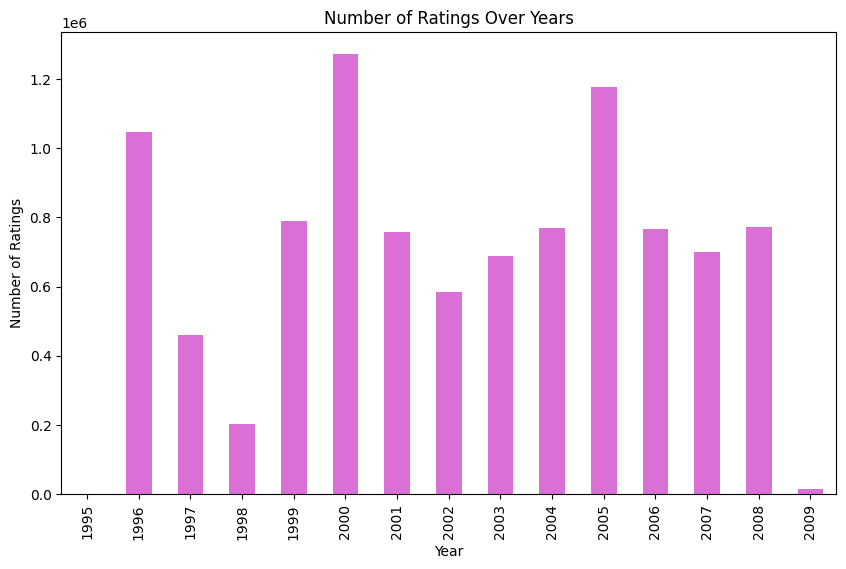

In [26]:
# Convert timestamp to datetime
ratings['Date'] = pd.to_datetime(ratings['Timestamp'], unit='s')
ratings['Year'] = ratings['Date'].dt.year

# Plot number of ratings per year
ratings_per_year = ratings.groupby('Year')['Rating'].count()

plt.figure(figsize=(10,6))
ratings_per_year.plot(kind='bar', color='orchid')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.title('Number of Ratings Over Years')
plt.show()


## 9. Genre Analysis

9.1. Most Common Genres

C:\Users\anujp\AppData\Local\Temp\ipykernel_23024\3427931037.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')


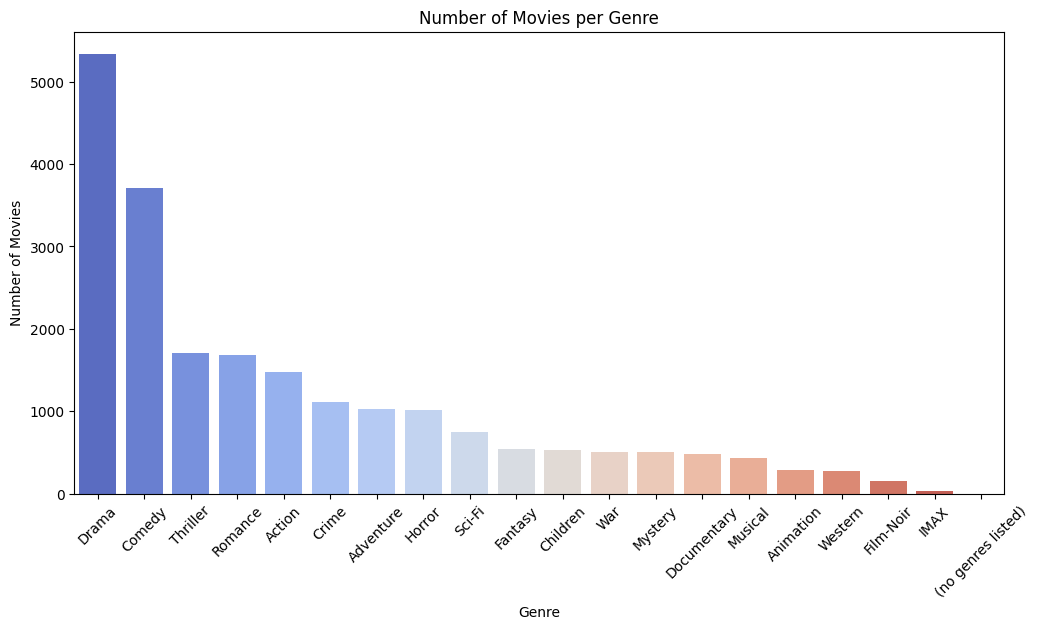

In [27]:
# Split genres and explode the list
movies['GenreList'] = movies['Genres'].str.split('|')
genre_data = movies.explode('GenreList')

# Count the number of movies per genre
genre_counts = genre_data['GenreList'].value_counts()

# Plot the genres
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette='coolwarm')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre')
plt.xticks(rotation=45)
plt.show()


9.2. Average Rating per Genre

C:\Users\anujp\AppData\Local\Temp\ipykernel_23024\3627138159.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_rating.index, y=genre_rating.values, palette='viridis')


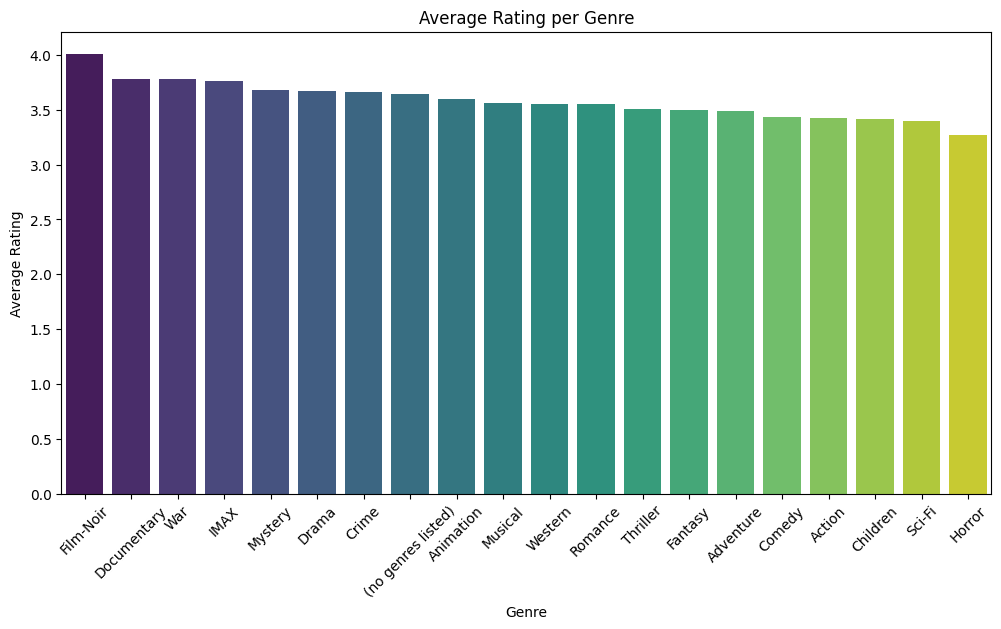

In [28]:
# Merge ratings with movies
ratings_movies = pd.merge(ratings, movies, on='MovieID')

# Explode genres
ratings_movies['GenreList'] = ratings_movies['Genres'].str.split('|')
ratings_movies = ratings_movies.explode('GenreList')

# Calculate average rating per genre
genre_rating = ratings_movies.groupby('GenreList')['Rating'].mean().sort_values(ascending=False)

# Plot average rating per genre
plt.figure(figsize=(12,6))
sns.barplot(x=genre_rating.index, y=genre_rating.values, palette='viridis')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Average Rating per Genre')
plt.xticks(rotation=45)
plt.show()


## 10. Tag Analysis

10.1. Most Common Tags

C:\Users\anujp\AppData\Local\Temp\ipykernel_23024\2269342112.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='autumn')


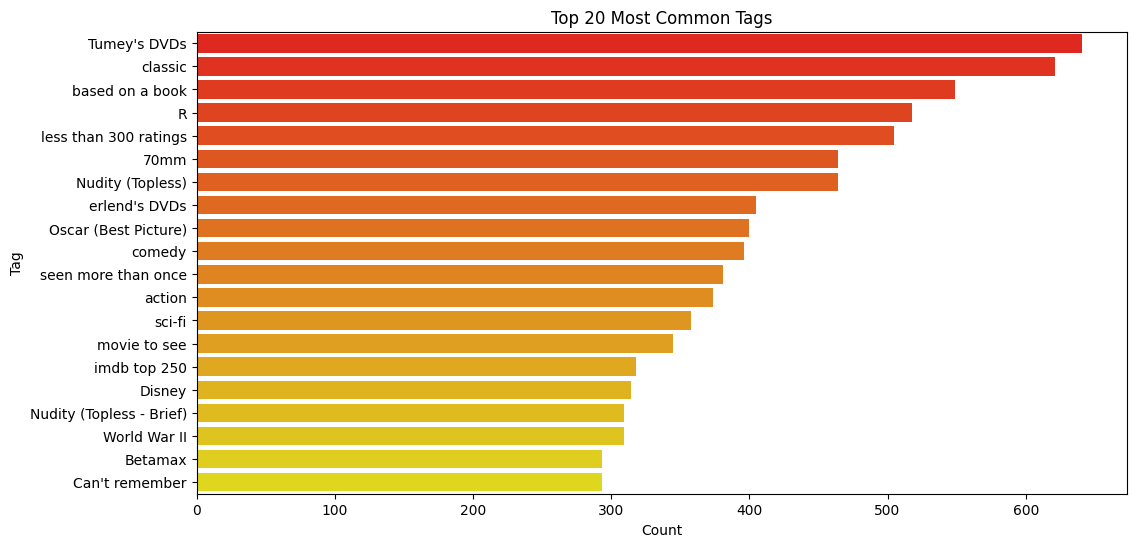

In [29]:
# Count the frequency of each tag
tag_counts = tags['Tag'].value_counts().head(20)

# Plot the top 20 tags
plt.figure(figsize=(12,6))
sns.barplot(x=tag_counts.values, y=tag_counts.index, palette='autumn')
plt.xlabel('Count')
plt.ylabel('Tag')
plt.title('Top 20 Most Common Tags')
plt.show()

## 11. User-Movie Interaction Matrix Sparsity

11.1. Calculate Sparsity

In [30]:
# Total possible interactions
num_users = ratings['UserID'].nunique()
num_movies = ratings['MovieID'].nunique()
total_possible_interactions = num_users * num_movies

# Actual interactions
actual_interactions = len(ratings)

# Sparsity
sparsity = 1 - (actual_interactions / total_possible_interactions)
print(f"Sparsity of the user-item interaction matrix: {sparsity:.4f}")


Sparsity of the user-item interaction matrix: 0.9866


## 12. Correlation Analysis


12.1. Correlation between User's Average Rating and Activity



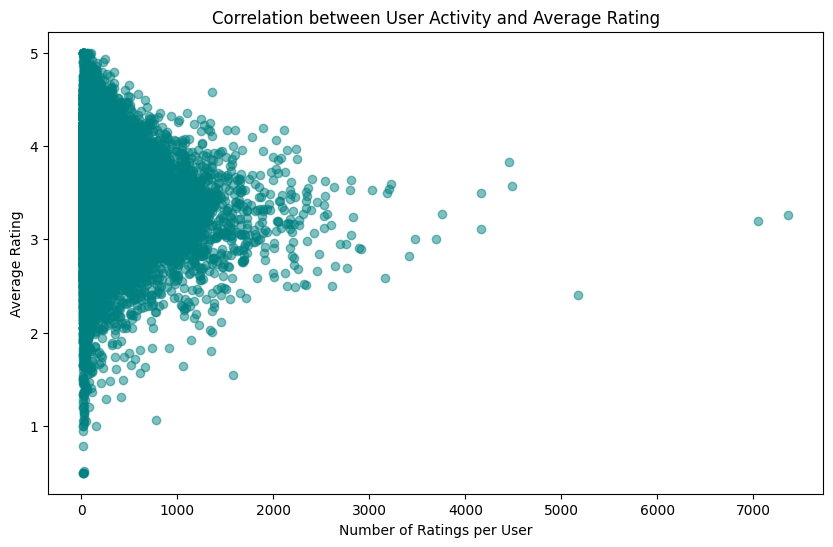

In [31]:
# Calculate average rating per user
user_avg_rating = ratings.groupby('UserID')['Rating'].mean().reset_index()
user_avg_rating.rename(columns={'Rating': 'AvgRating'}, inplace=True)

# Merge with user ratings count
user_activity = pd.merge(user_ratings_count, user_avg_rating, on='UserID')

# Scatter plot
plt.figure(figsize=(10,6))
plt.scatter(user_activity['RatingsCount'], user_activity['AvgRating'], alpha=0.5, color='teal')
plt.xlabel('Number of Ratings per User')
plt.ylabel('Average Rating')
plt.title('Correlation between User Activity and Average Rating')
plt.show()


## 13. Top 10 Movies by Average Rating


13.1. Movies with Highest Average Ratings

In [32]:
# Calculate average rating per movie
movie_avg_rating = ratings.groupby('MovieID')['Rating'].mean().reset_index()
movie_avg_rating.rename(columns={'Rating': 'AvgRating'}, inplace=True)

# Merge with movies DataFrame
movie_avg_rating = pd.merge(movie_avg_rating, movies[['MovieID', 'Title']], on='MovieID')

# Filter movies with at least N ratings
min_ratings = 50
movie_ratings_count = ratings.groupby('MovieID')['Rating'].count().reset_index()
movie_ratings_count.rename(columns={'Rating': 'RatingsCount'}, inplace=True)

movie_avg_rating = pd.merge(movie_avg_rating, movie_ratings_count, on='MovieID')
popular_movies = movie_avg_rating[movie_avg_rating['RatingsCount'] >= min_ratings]

# Top 10 movies
top_10_movies = popular_movies.sort_values('AvgRating', ascending=False).head(10)
print("Top 10 Movies by Average Rating:")
print(top_10_movies[['Title', 'AvgRating', 'RatingsCount']])


Top 10 Movies by Average Rating:
                                              Title  AvgRating  RatingsCount
315                Shawshank Redemption, The (1994)   4.457238         31126
843                           Godfather, The (1972)   4.415085         19814
49                       Usual Suspects, The (1995)   4.367142         24037
523                         Schindler's List (1993)   4.363483         25777
905   Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)   4.321966          3255
895                               Casablanca (1942)   4.319741         12507
887                              Rear Window (1954)   4.316544          8825
3348                        Double Indemnity (1944)   4.315439          2403
1935    Seven Samurai (Shichinin no samurai) (1954)   4.314119          5751
1186                          Third Man, The (1949)   4.313629          3265


## 14. Distribution of Ratings per Genre

14.1. Boxplot of Ratings by Genre

C:\Users\anujp\AppData\Local\Temp\ipykernel_23024\1926114510.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='GenreList', y='Rating', data=ratings_movies[ratings_movies['GenreList'].isin(genres_to_plot)], palette='Set3')


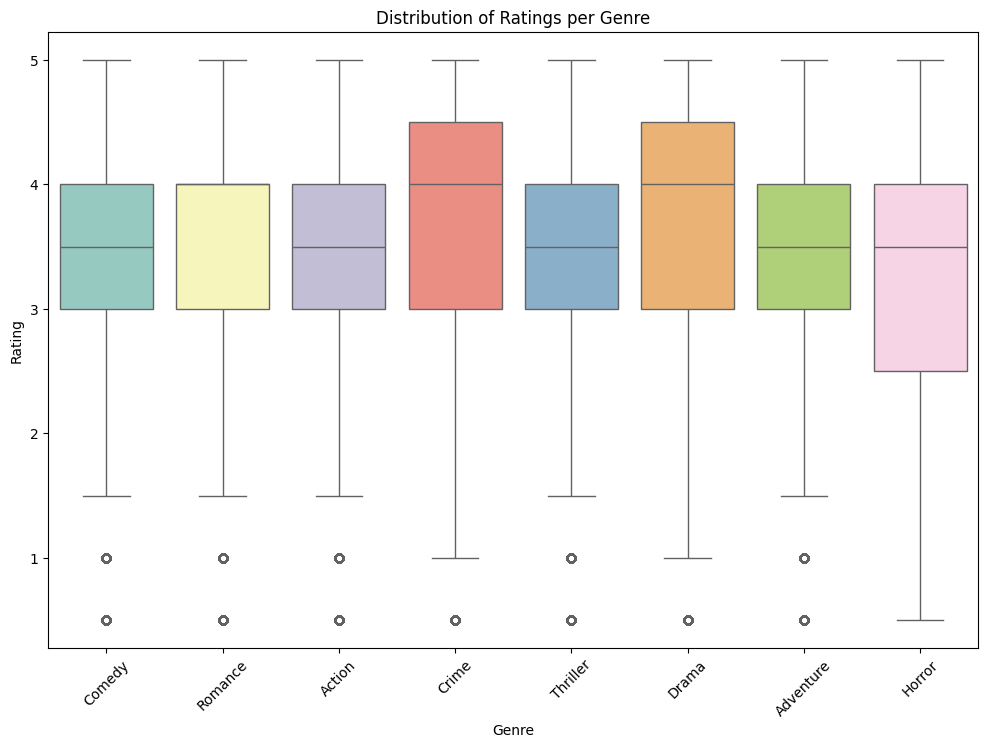

In [33]:
# Using the ratings_movies DataFrame from previous steps

# For genres with sufficient data
genres_to_plot = genre_counts[genre_counts > 1000].index.tolist()

plt.figure(figsize=(12,8))
sns.boxplot(x='GenreList', y='Rating', data=ratings_movies[ratings_movies['GenreList'].isin(genres_to_plot)], palette='Set3')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.title('Distribution of Ratings per Genre')
plt.xticks(rotation=45)
plt.show()


## 15. Heatmap of User-Item Interactions


15.1. Visualize a Subset

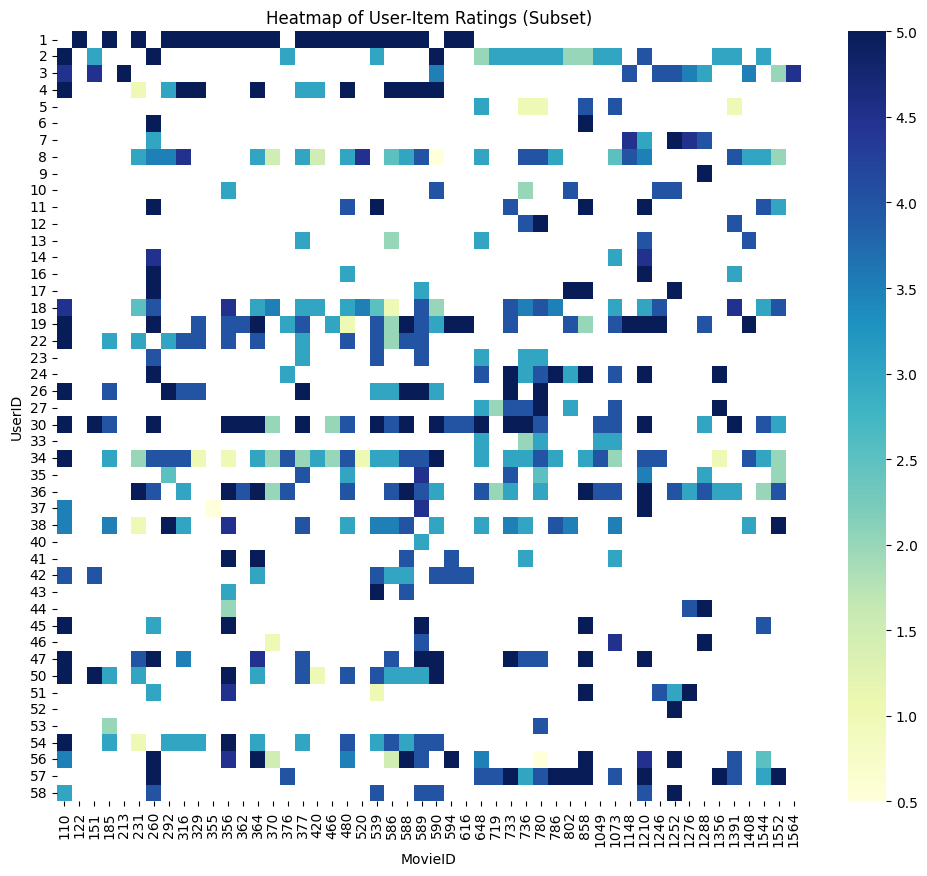

In [34]:
# Create a pivot table for a subset of users and movies
subset_users = ratings['UserID'].unique()[:50]
subset_movies = ratings['MovieID'].unique()[:50]
subset_ratings = ratings[ratings['UserID'].isin(subset_users) & ratings['MovieID'].isin(subset_movies)]
user_item_matrix = subset_ratings.pivot_table(index='UserID', columns='MovieID', values='Rating')

# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(user_item_matrix, cmap='YlGnBu')
plt.xlabel('MovieID')
plt.ylabel('UserID')
plt.title('Heatmap of User-Item Ratings (Subset)')
plt.show()


## 16. Year of Movie Release Analysis


16.1. Extract Year from Title

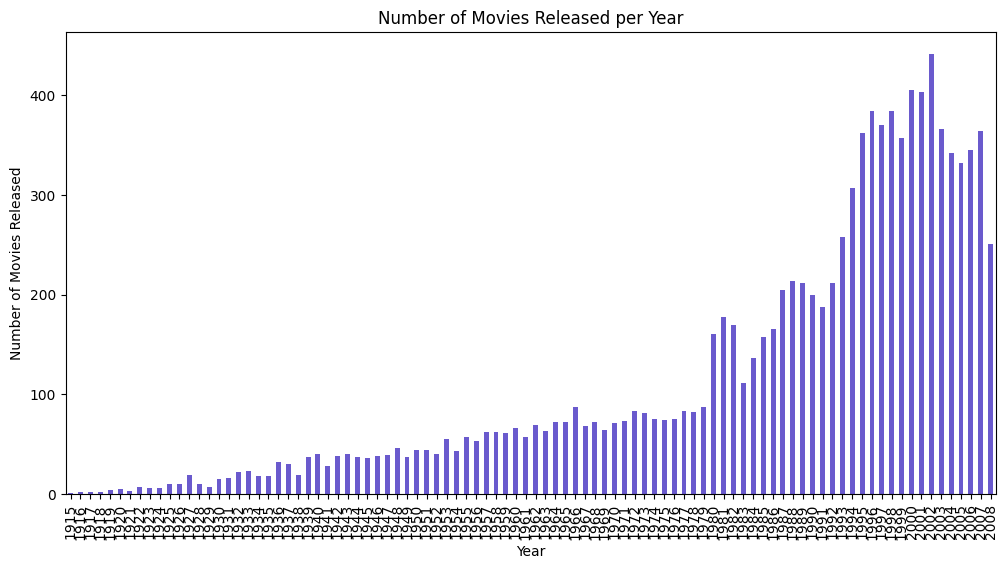

In [35]:
# Extract year from title
movies['Year'] = movies['Title'].str.extract('.*\((\d{4})\).*', expand=False)
movies['Year'] = pd.to_numeric(movies['Year'], errors='coerce')

# Plot number of movies released per year
movies_per_year = movies['Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
movies_per_year.plot(kind='bar', color='slateblue')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Year')
plt.show()


## 17. Most Active Users

17.1. Top Users by Number of Ratings

In [43]:
# Top 10 users by number of ratings
top_users = user_ratings_count.sort_values('RatingsCount', ascending=False).head(10)
print("Top 10 Users by Number of Ratings:")
print(top_users)


Top 10 Users by Number of Ratings:
       UserID  RatingsCount
57959   59269          7359
65888   67385          7047
14085   14463          5169
66709   68259          4483
26767   27468          4449
3677     3817          4165
19119   19635          4165
61748   63134          3755
57058   58357          3697
26883   27584          3479


## 18. Most Rated Movies

18.1. Top Movies by Number of Ratings

In [44]:
# Top 10 movies by number of ratings
top_movies = movie_ratings_count.sort_values('RatingsCount', ascending=False).head(10)
top_movies = pd.merge(top_movies, movies[['MovieID', 'Title']], on='MovieID')
print("Top 10 Movies by Number of Ratings:")
print(top_movies[['Title', 'RatingsCount']])


Top 10 Movies by Number of Ratings:
                                               Title  RatingsCount
0                                Pulp Fiction (1994)         34864
1                                Forrest Gump (1994)         34457
2                   Silence of the Lambs, The (1991)         33668
3                               Jurassic Park (1993)         32631
4                   Shawshank Redemption, The (1994)         31126
5                                  Braveheart (1995)         29154
6                               Fugitive, The (1993)         28951
7                  Terminator 2: Judgment Day (1991)         28948
8  Star Wars: Episode IV - A New Hope (a.k.a. Sta...         28566
9                                   Apollo 13 (1995)         27035


## 19. Time Between Ratings

19.1. Time Difference Analysis

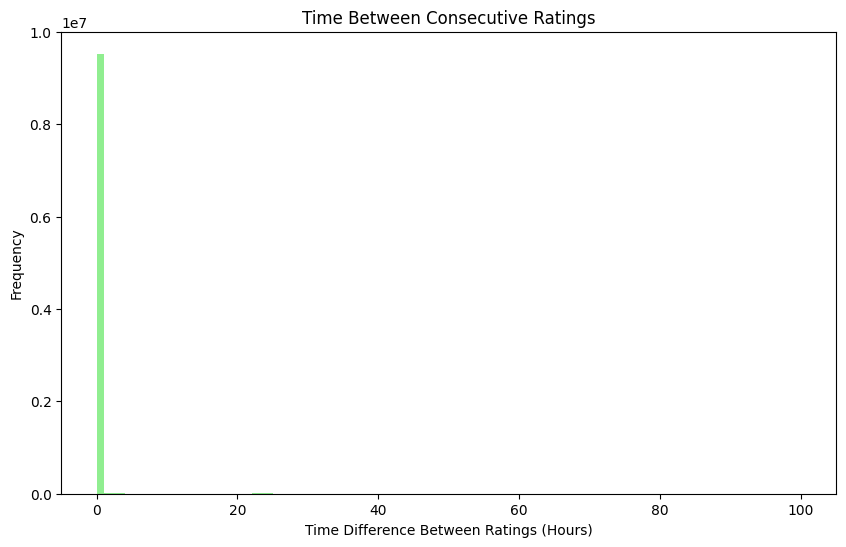

In [45]:
# Calculate time differences between consecutive ratings for users
ratings_sorted = ratings.sort_values(['UserID', 'Timestamp'])
ratings_sorted['TimeDiff'] = ratings_sorted.groupby('UserID')['Timestamp'].diff()

# Plot histogram of time differences (in hours)
time_diffs = ratings_sorted['TimeDiff'].dropna() / 3600  # Convert seconds to hours
plt.figure(figsize=(10,6))
plt.hist(time_diffs, bins=100, range=(0, 100), color='lightgreen')
plt.xlabel('Time Difference Between Ratings (Hours)')
plt.ylabel('Frequency')
plt.title('Time Between Consecutive Ratings')
plt.show()


## 20. User Rating Variability

20.1. Standard Deviation of Ratings per User

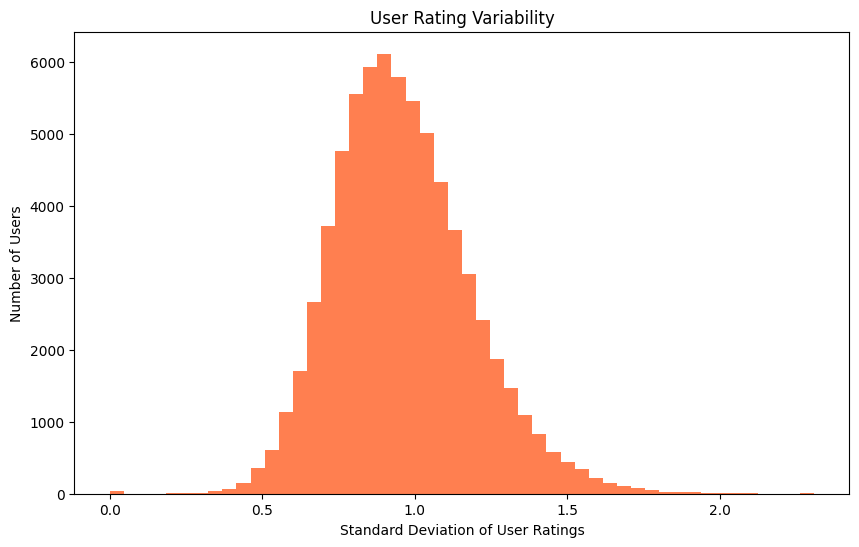

In [46]:
# Calculate standard deviation of ratings per user
user_rating_std = ratings.groupby('UserID')['Rating'].std().reset_index()
user_rating_std.rename(columns={'Rating': 'RatingStd'}, inplace=True)

# Plot distribution
plt.figure(figsize=(10,6))
plt.hist(user_rating_std['RatingStd'].dropna(), bins=50, color='coral')
plt.xlabel('Standard Deviation of User Ratings')
plt.ylabel('Number of Users')
plt.title('User Rating Variability')
plt.show()


## 21. Cross Analysis of Genres and Tags

21.1. Tags per Genre

In [47]:
# Merge tags with movies
tags_movies = pd.merge(tags, movies[['MovieID', 'Genres']], on='MovieID')
tags_movies['GenreList'] = tags_movies['Genres'].str.split('|')
tags_movies = tags_movies.explode('GenreList')

# Most common tags per genre
tags_per_genre = tags_movies.groupby('GenreList')['Tag'].value_counts().groupby(level=0).head(5)

print("Most Common Tags per Genre:")
print(tags_per_genre)


Most Common Tags per Genre:
GenreList           Tag                   
(no genres listed)  National Film Registry     1
                    avant garde                1
                    beat generation            1
                    jack kerouac               1
                    short                      1
                                              ..
Western             western                   47
                    Clint Eastwood            35
                    70mm                      28
                    less than 300 ratings     28
                    John Wayne                27
Name: count, Length: 100, dtype: int64


23. Popularity vs. Average Rating

## 22. User-Genre Preferences


22.1. User's Average Rating per Genre



In [48]:
# Create a pivot table
user_genre_rating = ratings_movies.pivot_table(index='UserID', columns='GenreList', values='Rating', aggfunc='mean')

# Display the pivot table for a few users
print("User-Genre Average Ratings:")
print(user_genre_rating.head())


User-Genre Average Ratings:
GenreList  (no genres listed)    Action  Adventure  Animation  Children  \
UserID                                                                    
1                         NaN  5.000000   5.000000        5.0      5.00   
2                         NaN  3.285714   3.400000        NaN      3.00   
3                         NaN  3.857143   3.666667        4.0      4.00   
4                         NaN  3.941176   4.230769        5.0      5.00   
5                         NaN  1.800000   3.000000        1.0      3.25   

GenreList    Comedy     Crime  Documentary     Drama   Fantasy  Film-Noir  \
UserID                                                                      
1          5.000000  5.000000          NaN  5.000000  5.000000        NaN   
2          3.000000  2.000000          NaN  3.285714  3.000000        NaN   
3          3.636364  4.000000          NaN  4.175000  4.166667        4.0   
4          3.684211  4.200000          NaN  4.571429  4.60000

24.1. User's Average Rating per Genre

24.1. User's Average Rating per Genre

In [50]:
# Create a pivot table
user_genre_rating = ratings_movies.pivot_table(index='UserID', columns='GenreList', values='Rating', aggfunc='mean')

# Display the pivot table for a few users
print("User-Genre Average Ratings:")
print(user_genre_rating.head())


User-Genre Average Ratings:
GenreList  (no genres listed)    Action  Adventure  Animation  Children  \
UserID                                                                    
1                         NaN  5.000000   5.000000        5.0      5.00   
2                         NaN  3.285714   3.400000        NaN      3.00   
3                         NaN  3.857143   3.666667        4.0      4.00   
4                         NaN  3.941176   4.230769        5.0      5.00   
5                         NaN  1.800000   3.000000        1.0      3.25   

GenreList    Comedy     Crime  Documentary     Drama   Fantasy  Film-Noir  \
UserID                                                                      
1          5.000000  5.000000          NaN  5.000000  5.000000        NaN   
2          3.000000  2.000000          NaN  3.285714  3.000000        NaN   
3          3.636364  4.000000          NaN  4.175000  4.166667        4.0   
4          3.684211  4.200000          NaN  4.571429  4.60000

# Merge the dataframe while on the MovieID

In [52]:
merged_data = pd.merge(ratings[['UserID', 'MovieID', 'Rating']],
                       movies[['MovieID', 'Title']],
                       on='MovieID',
                       how='left')

# Display the first few rows of the merged DataFrame to verify
print(merged_data.head())

   UserID  MovieID  Rating                 Title
0       1      122     5.0      Boomerang (1992)
1       1      185     5.0       Net, The (1995)
2       1      231     5.0  Dumb & Dumber (1994)
3       1      292     5.0       Outbreak (1995)
4       1      316     5.0       Stargate (1994)


# Save as csv

In [55]:
# Save the merged DataFrame to a CSV file with the correct file extension
merged_data.to_csv("C:\\Users\\anujp\\OneDrive\\Desktop\\MovieRecommendations\\data\\Final_data\\Final_data.csv", index=False)

print("CSV file has been saved successfully.")


CSV file has been saved successfully.


We use this csv to train the model
